# 总体说明
Scipy是一款方便、易于使用、专为科学和工程设计的Python工具包。它包括统计、优化、涉及线性代数模块、傅里叶变化、信号和人、图像处理、常微分方程求解器等众多数据包。

## 1、最优化

### （1）数据建模和拟合
Scipy函数curve_fit使用基于卡方的方法进行线性回归分析。首先使用f(x) = a * x + b生成带有噪声的数据，然后使用curv_fit来拟合

In [1]:
'''线性回归'''
import numpy as np 
from scipy.optimize import curve_fit

In [2]:
#创建函数 f(x) = a * x + b
def func(x, a, b):
    return a * x + b

In [3]:
#创建干净数据
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

In [4]:
#添加噪声
yn = y + 0.9 * np.random.normal(size = len(x))

In [5]:
#拟合噪声数据
popt, pcov = curve_fit(func, x, yn)

In [6]:
#输出最优参数
print popt

[ 0.92549532  2.21548055]


/home/yzw/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


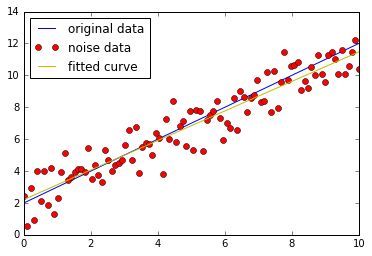

In [7]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (14, 12))
import numpy as np
%matplotlib inline
 
y_fit = func(x, popt[0], popt[1])
plt.plot(x, y, 'b-', label = u'original data')
plt.plot(x, yn, 'ro', label = u'noise data')
plt.plot(x, y_fit, 'y-', label = u'fitted curve')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
'''高斯分布拟合'''
#创建函数
def func(x, a, b, c):
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

In [9]:
#生成干净数据
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

In [10]:
#添加噪声
yn = y + 0.2 * np.random.normal(size = len(x))

In [11]:
#拟合
popt, pcov = curve_fit(func, x, yn)

In [12]:
#输出最优解
print popt

[ 0.94398623  4.94399432  2.16760024]


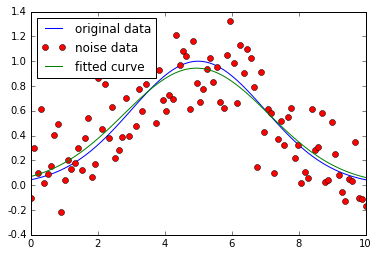

In [13]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (14, 12))
import numpy as np
%matplotlib inline
 
y_fit = func(x, popt[0], popt[1], popt[2])
plt.plot(x, y, 'b-', label = u'original data')
plt.plot(x, yn, 'ro', label = u'noise data')
plt.plot(x, y_fit, 'g-', label = u'fitted curve')
plt.legend(loc = 'upper left')
plt.show()

### (2)函数求解
Scipy的optimize模块中有大量的函数求解工具，fsolve是其中最常用的。

In [14]:
'''线性函数求解'''
from scipy.optimize import fsolve
import numpy as np

In [15]:
#创建函数,并初始化x0
line = lambda x : x + 3
x0 = -2

In [16]:
#求解
solution = fsolve(line, x0)

In [17]:
#输出最优解
print solution

[-3.]


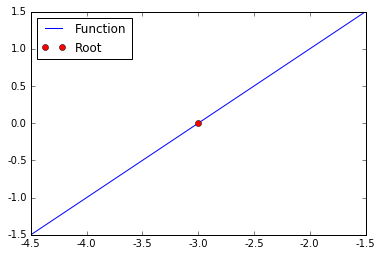

In [18]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (14, 12))
import numpy as np
%matplotlib inline

x = np.linspace(-4.5, -1.5, 10)
y = line(x)

y_root = line(solution)

plt.plot(x, y, 'b-', label = u'Function')
plt.plot(solution, y_root, 'ro', label = u'Root')

plt.legend(loc = 'upper left')
plt.show()

In [19]:
'''求函数交叉点'''
from scipy.optimize import fsolve
import numpy as np

In [20]:
#创建函数
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)

In [21]:
#两个函数
funky = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5

In [22]:
#产生数据结果
x = np.linspace(0, 45, 10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])

In [23]:
#输出结果
print result, line(result)

[ 13.40773078  18.11366128  31.78330863  37.0799992   39.84837786
  43.8258775 ] [-0.36592269 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


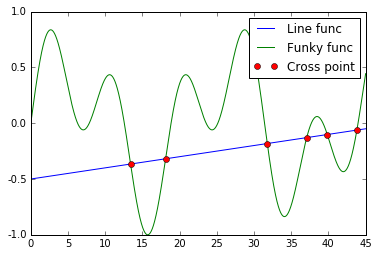

In [24]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (14, 12))
import numpy as np
%matplotlib inline
 
y_cross_point = line(result)
y_line = line(x)
y_funky = funky(x)
plt.plot(x, y_line, 'b-', label = u'Line func')
plt.plot(x, y_funky, 'g-', label = u'Funky func')
plt.plot(result, y_cross_point, 'ro', label = u'Cross point')
plt.legend()
plt.show()

## 2、插值

### （1）interp1d

In [25]:
'''正弦函数插值'''
import numpy as np
from scipy.interpolate import interp1d

In [26]:
#创建待插值的数据
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)

In [27]:
#分别用linear和quadratic插值
fl = interp1d(x, y, kind = 'linear')
fq = interp1d(x, y, kind = 'quadratic')

In [28]:
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

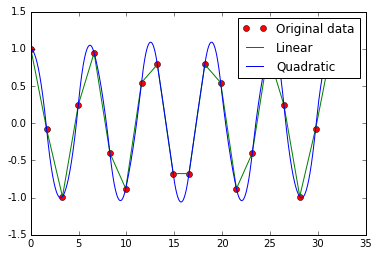

In [29]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (20, 20))
import numpy as np
%matplotlib inline
 
plt.plot(x, y, 'ro', label = u'Original data')
plt.plot(xint, yintl, 'g-', label = u'Linear')
plt.plot(xint, yintq, 'b-', label = u'Quadratic')
plt.legend()
plt.show()

### (2)UnivariateSpline

In [30]:
'''噪声数据插值'''
import numpy as np
from scipy.interpolate import UnivariateSpline

In [31]:
#创建含噪声的待插值数据
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10

In [32]:
#插值参数s为smoothing factor
f = UnivariateSpline(x, y, s = 1)
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)

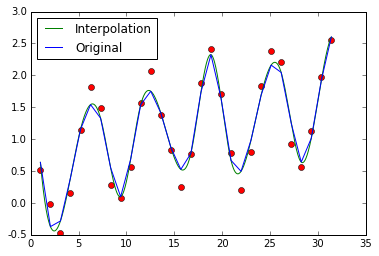

In [33]:
#绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (12, 10))
import numpy as np
%matplotlib inline
 
y_f = f(x)
plt.plot(x, y, 'ro')
plt.plot(xint, yint, 'g-', label = u'Interpolation')
plt.plot(x, y_f, 'b-', label = u'Original')
plt.legend(loc = 'upper left')
plt.show()

### (3)griddata

In [34]:
'''利用插值重构图片'''
import numpy as np
from scipy.interpolate import griddata

In [35]:
#定义一个函数
ripple = lambda x, y : np.sqrt(x ** 2 + y ** 2) + np.sin(x ** 2 + y ** 2)

In [36]:
#生成 grid 数据,复数定义了生成 grid 数据的 step,若无该复数则 step 为 5
grid_x,grid_y = np.mgrid[0 : 5 : 1000j, 0 : 5 : 1000j]

In [37]:
# 生成待插值的样本数据
xy = np.random.rand(1000, 2)
sample = ripple(xy[:, 0] * 5 , xy[:, 1] * 5)

In [38]:
# 用 cubic 方法插值
grid_z0 = griddata(xy * 5, sample, (grid_x, grid_y), method = 'cubic')

### (4)SmoothBivariateSpline

In [39]:
'''利用插值重构图片'''
import numpy as np 
from scipy.interpolate import SmoothBivariateSpline as SBS

In [40]:
# 定义函数
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)

In [41]:
# 生成待插值样本
xy= np.random.rand(1000, 2)
x, y = xy[:,0], xy[:,1]
sample = ripple(xy[:,0] * 5 , xy[:,1] * 5)

In [42]:
# 插值
fit = SBS(x * 5, y * 5, sample, s = 0.01, kx = 4, ky = 4)
interp = fit(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000))

/home/yzw/anaconda2/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:1044: UserWarning: ier=41669
  warnings.warn(message)


注意: SmoothBivariateSpline 有时候表现比 Spline 更好一些, 但是它对样本数据更敏 感
一些,相对而言 Spline 更加健壮。

## 3. 积分
SciPy 中的积分是近似的数值积分,SymPy 是一个符号积分的工具包。

### (1)解析积分

In [43]:
import numpy as np
from scipy.integrate import quad

In [44]:
# 定义被积函数
func = lambda x: np.cos(np.exp(x)) ** 2

In [45]:
# 积分
solution = quad(func, 0, 3)
print solution

(1.296467785724373, 1.3977971863744082e-09)


### (2)数值积分

In [46]:
import numpy as np
from scipy.integrate import quad, trapz

In [47]:
# Setting up fake data
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)

In [48]:
# Integrating function with upper and lower # limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)

In [49]:
#输出结果
print('fsolution = ' + str(fsolution[0]))
print('dsolution = ' + str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))

fsolution = 5.10034506754
dsolution = 5.12899584884
The difference is 0.0286507812965


## 4. 统计
SciPy 中有包括 mean, std, median, argmax, 及 argmin 等在内的基本统计函数, 而且
numpy.arrays 类型中内置了大部分统计函数,以便于使用。

In [50]:
import numpy as np

In [51]:
# 创建大小为 1000 的随机数组
x = np.random.randn(1000)

In [52]:
mean = x.mean() # 均值
std = x.std() # 标准差
var = x.var() # 方差

In [53]:
print 'mean = ' + str(mean)
print 'std = ' + str(std)
print 'var = ' + str(var)

mean = 0.037838154737
std = 1.01906841165
var = 1.03850042762


SciPy 中还包括了各种分布、函数等工具。连续和离散分布 SciPy 的 scipy.stats 包中包含
了大概 80 种连续分布和 10 种离散分布。下图是其中 的 20 种连续分布的概率密度函数。
这些分布函数其实都依赖于 numpy.random 函数。

有几种方法来使用 scipy.stats 中的分布时: 概率密度函数(PDFs) 、 累积分布函 数
(CDFs)、随机变量样本(RVSs)、百分比点函数(PPFs)等。下面基于标准正态 分布函
数,来演示如何使用这些分布。

In [54]:
import numpy as np
from scipy.stats import norm

In [55]:
# 创建样本区间
x = np.linspace(-5,5,1000)

In [56]:
# 设置正态分布参数,loc 为均值,scale 为标准差
dist = norm(loc=0, scale=1)

In [57]:
# 得到正态分布的 PDF 和 CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)

In [58]:
# 根据分布生成 500 个随机数
sample = dist.rvs(500)

可以基于 SciPy.stats 中的任何连续分布生成随机数,有需要请查看文档。除此外, 如
泊松分布、二项分布、几何分布等离散分布的使用也很简单。下式为几何分布的概率 分布
函数(PMF):  PMF = (1 - p)^(1 - k) * p

In [59]:
import numpy as np
from scipy.stats import geom

In [60]:
# 设置几何分布的参数
p = 0.5
dist = geom(p)

In [61]:
# 设置样本区间
x = np.linspace(0, 5, 1000)

In [62]:
# 得到几何分布的 PMF 和 CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)

In [63]:
# 生成 500 个随机数 
sample = dist.rvs(500)

#### 函数
SciPy 中有超过 60 种统计函数。 stats 包中包括了诸如 kstest 和 normaltest 等的
样

In [64]:
'''样本分布检验'''
import numpy as np
from scipy import stats

In [65]:
# 生成 包括 100 个服从正态分布的随机数样本
sample = np.random.randn(100)

In [66]:
#用 normaltest 检验原假设
out=stats.normaltest(sample)
print('normaltest output')
print('Z-score = ' + str(out[0]))
print('P-value = ' + str(out[1]))

normaltest output
Z-score = 1.1335674794
P-value = 0.567347243846


In [67]:
# kstest 是检验拟合度的 Kolmogorov-Smirnov 检验,这里针对正态分布进行检验 ,
# D 是 KS 统计量的值,越接近 0 越好
out = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))


kstest output for the Normal distribution
D = 0.0785119673578
P-value = 0.553771346215


In [68]:
# 类似地可以针对其他分布进行检验,例如 Wald 分布
out = stats.kstest(sample, 'wald')
print('\nkstest output for the Wald distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))


kstest output for the Wald distribution
D = 0.517028391228
P-value = 0.0



SciPy 的 stats 模块中还提供了一些描述函数,如几何平均(gmean)、偏度( skew)、
样本频数(itemfreq)等。

In [69]:
import numpy as np
from scipy import stats

In [70]:
# 生成包括 100 个服从正态分布的随机数样本
sample = np.random.randn(100)

In [71]:
# 调和平均数,样本值须大于 0
out = stats.hmean(sample[sample > 0])
print('Harmonic mean = ' + str(out))

Harmonic mean = 0.108111579818


In [72]:
# 计算 -1 到 1 之间样本的均值
out = stats.tmean(sample, limits=(-1, 1))
print('\nTrimmed mean = ' + str(out))


Trimmed mean = -0.0228689969481


In [73]:
# 计算样本偏度
out = stats.skew(sample)
print('\nSkewness = ' + str(out))


Skewness = -0.0594749716368


In [74]:
# 函数 describe 可以一次给出样本的多种描述统计结果
out = stats.describe(sample)
print('\nSize = ' + str(out[0]))
print('Min = ' + str(out[1][0]))
print('Max = ' + str(out[1][1]))
print('Mean = ' + str(out[2]))
print('Variance = ' + str(out[3]))
print('Skewness = ' + str(out[4]))
print('Kurtosis = ' + str(out[5]))


Size = 100
Min = -2.55553070993
Max = 2.05616730362
Mean = 0.130185191969
Variance = 0.897306578196
Skewness = -0.0594749716368
Kurtosis = -0.129991725889


SciPy 的 stats 模块中还有很多统计工具,可以满足绝大多数需要。还可以用 RPy, 通过
它能够在 Python 中调用 R 语言进行统计分析。此外,Pandas 是 python 的一个强 大的工具
包,它可以在大数据上进行快速的统计分析。

## 5. 空间和聚类分析
SciPy 包括 scipy.spatial 类和 scipy.cluster 类分别用于空间和聚类分析。前者用于 分析数
据点之间的距离,后者包括两个子类矢量量化(vq)和层次聚类(hierarchy)。

### (1)矢量量化(Vector Quantization)
矢量量化是信号处理、数据压缩和聚类等领域通用的术语。

In [75]:
'''k均值聚类'''
import numpy as np
from scipy.cluster import vq

In [76]:
# 生成数据
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50, 2)

In [77]:
# 将所有数据放入一个 180 x 2 的数组
data = np.vstack([c1, c2, c3])

In [78]:
# 利用 k 均值方法计算聚类的质心和方差
centroids, variance = vq.kmeans(data, 3)

In [79]:
# 变量 identified 中存放关于数据聚类的信息
identified, distance = vq.vq(data, centroids)

In [80]:
# 获得各类别的数据
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

### (2)层次聚类
层次聚类是一种重要的聚类方法, 但其输出结果比较复杂,不能像 k 均值那样给出
清晰的聚类结果。 下面是一个层次聚类的例子, 输入一个距离矩阵, 输出为一个树状图。

In [81]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy
%matplotlib inline

In [82]:
# 用于生成聚类数据的函数 
def clusters(number=20, cnumber=5, csize=10):
    # 聚类服从高斯分布
    rnum = np.random.rand(cnumber, 2)
    rn = rnum[:, 0] * number
    rn = rn.astype(int)
    rn[np.where(rn < 5)] = 5
    rn[np.where(rn > number / 2.)] = round(number / 2., 0)
    ra = rnum[:, 1] * 2.9
    ra[np.where(ra < 1.5)] = 1.5
    cls = np.random.randn(number, 3) * csize
    rxyz = np.random.randn(cnumber - 1, 3)
    for i in xrange(cnumber - 1):
        tmp = np.random.randn(rn[i + 1], 3)
        x = tmp[:, 0] + (rxyz[i, 0] * csize)
        y = tmp[:, 1] + (rxyz[i, 1] * csize)
        z = tmp[:, 2] + (rxyz[i, 2] * csize)
        tmp = np.column_stack([x, y, z])
        cls = np.vstack([cls, tmp])
    return cls

In [83]:
# 创建待聚类数据及矩离矩阵
cls = clusters()
D = pdist(cls[:, 0:2])
D = squareform(D)

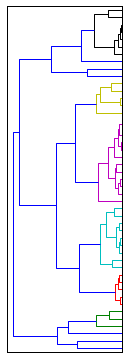

In [84]:
#绘制左侧树状图
fig = mpl.figure(figsize = (8, 8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y1 = hy.linkage(D, method = 'complete')
cutoff = 0.3 * np.max(Y1[:, 2])
Z1 = hy.dendrogram(Y1,orientation = 'left',color_threshold = cutoff)
ax1.xaxis.set_visible(False) 
ax1.yaxis.set_visible(False)

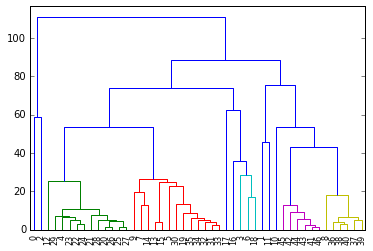

In [85]:
# 绘制顶部树状图
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Y2 = hy.linkage(D, method = 'average')
cutoff = 0.3 * np.max(Y2[:, 2])
Z2 = hy.dendrogram(Y2,color_threshold = cutoff)
ax2.xaxis.set_visible(False) 
ax2.yaxis.set_visible(False)

In [86]:
# 显示距离矩阵
ax3 = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1, :]
D = D[:, idx2]
ax3.matshow(D,aspect = 'auto',origin = 'lower',cmap = mpl.cm.YlGnBu)
ax3.xaxis.set_visible(False) 
ax3.yaxis.set_visible(False)

In [87]:
# 保存图片 ,显示图片
fig.savefig('cluster_hy_f01.pdf', bbox = 'tight')
mpl.show()

在上图虽然计算了数据点之间的距离, 但是还是难以将各类区分开。 函数 fcluster 可以
根据阈值来区分各类,其输出结果依赖于 linkage 函数所采用的方法,如 complete 或 single
等,它的第二个参数即是阈值。dendrogram 函数中默认的阈值是 0.7 * np.max(Y[:, 2]),这
里还使用 0.3。

In [88]:
# 导入的包同上例一致,函数 cluster 同上例
# 获得不同类别数据点的坐标
def group(data, index):
    number = np.unique(index)
    groups = []
    for i in number:
        groups.append(data[index == i])
    return groups

In [89]:
# 创建数据
cls = clusters()

In [90]:
# 计算 kinkage 矩阵
Y = hy.linkage(cls[:,0:2], method='complete')

In [91]:
# 从层次数据结构中, 用 fcluster 函数将层次结构的数据转为 flat clusters
cutoff = 0.3 * np.max(Y[:, 2])
index = hy.fcluster(Y, cutoff, 'distance')

In [92]:
# 使用 grooup 函数将数据划分类别
groups = group(cls, index)

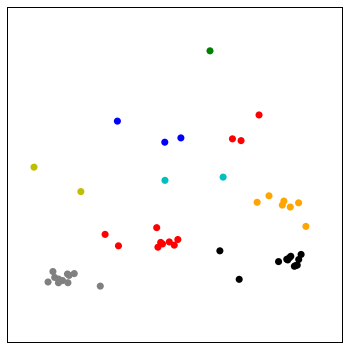

In [93]:
# 绘制数据点
fig = mpl.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
colors = ['r', 'c', 'b', 'g', 'orange', 'k', 'y', 'gray']
for i, g in enumerate(groups):
    i = np.mod(i, len(colors))
    ax.scatter(g[:,0], g[:,1], c=colors[i], edgecolor='none', s=50)
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
   
fig.savefig('cluster_hy_f02.pdf', bbox = 'tight')
mpl.show()

## 6. 稀疏矩阵
NumPy 处理 10 6 级别的数据没什么大问题,当数据量达到 10 7 级别时速度开始变慢,
内存受到限制(具体情况取决于实际内存大小)。当处理超大规模数据集,比如 10 10 级别,
且数据中包含大量的 0 时,可采用稀疏矩阵可显著的提高速度和效率。
提示:使用 data.nbytes 可查看数据所占空间大小

In [94]:
'''矩阵与稀疏矩阵运算对比'''
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse

In [95]:
import time
N = 3000

In [96]:
# 创建随机稀疏矩阵
m = scipy.sparse.rand(N, N)

In [97]:
# 创建包含相同数据的数组
a = m.toarray()
print('The numpy array data size: ' + str(a.nbytes) + ' bytes')
print('The sparse matrix data size: ' + str(m.data.nbytes) + ' bytes')

The numpy array data size: 72000000 bytes
The sparse matrix data size: 720000 bytes


In [98]:
# 数组求特征值
t0 = time.time()
res1 = eigh(a)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Non-sparse operation takes ' + dt)

Non-sparse operation takes 32.529 seconds


In [99]:
# 稀疏长阵求特征值
t0 = time.time()
res2 = eigsh(m)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Sparse operation takes ' + dt)

Sparse operation takes 0.785 seconds


非几何的稀疏矩阵可用于优化、经济建模、数学和统计,和网络/图等的运算。利用
scipy.io 模块可读写 Matrix Market、Harwell-Boeing 或 MatLab 格式的稀疏矩阵数据文件。